## Complex numbers
In this notebook, we'll go through some of the basics of complex numbers. I know this may seem somehat unrelated to audio, but soon enough you'll see and hear how critical complex numbers are for audio representation. They in fact make our lives much simpler. 

In [ ]:
# Starting once again with the imports.
%pip install ipympl
import numpy as np 
import matplotlib
if not hasattr(matplotlib.RcParams, "_get"):
    matplotlib.RcParams._get = dict.get
from  matplotlib import patches
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
from ipywidgets import * # interactive plots
import IPython
from IPython.display import Audio, Image
%matplotlib ipympl


### Working with complex numbers in python

The standard representation of a complex number, $z$, is given by

$$\begin{equation}
z = a + jb
\end{equation}$$

which consists some number $a$ and another number $b$, which is multiplied by the complex variable $j$ which is defined as $j = \sqrt{-1}$. We give specific names to these two parts of the complex number: (i) the real part denoted by $a$, and (ii) the imaginary part denoted by $b$. (Note that the imaginary part of the complex number is just $b$ not $jb$!). 

So for instance, a complex number, $z = 3 + j4$ has a real part of 3 and an imaginary part of 4. At first sight, this all seems very abstract, but let's play around with them in this notebook to get a better sense of how to work with them and what they actually mean. In due time, you will come to realize that complex numbers are a fundamental in representing, analyzing, or processing audio. But we will have to be patient as we need to get the basics first!

Okay, well first of all, how do we represent complex numbers in python? It's pretty straightforward, we simply assign it to a variable. Python recognizes "j" as the complex variable, so we just write complex numbers as we do on paper. See the code below and try to write your own numbers. A few things to note:

- We do not need to use the multiplication operator to multiply the imaginary part by $j$. In fact if you do this, then python will interpret $j$ as a variable and not $\sqrt{-1}$. 

- You need to explicitly write the value of the imaginary part if it is 1. Try for instance to write the complex number 4 + j and see what happens. 

- When a complex number is defined, it has attributes that allows you to easily get the real part, imaginary part, complex conjugate, etc. 


In [50]:
z = 30 - 1j  # Write your complex number here

# Have a look at the commands below to see how the real and imaginary parts are extracted:

print("The data type of z is ",type(z))
print("The complex number is ",z)
print("The real part is ",z.real)
print("The imaginary part is ",z.imag)
print("The complex conjugate is ",z.conjugate()) # here you can also you np.conj(z) (from numpy library)


The data type of z is  <class 'complex'>
The complex number is  (30-1j)
The real part is  30.0
The imaginary part is  -1.0
The complex conjugate is  (30+1j)


### Arithmetic with complex numbers

We can also define rules of arithmetic, i.e. for addition, subtraction, multiplication, and division with complex numbers. The key detail is that we need to treat the real and imaginary parts separately in addition and subtraction, and keep an eye on the fact that $j = \sqrt{-1} \rightarrow j^{2} = -1$. In python, once a complex number is defined, the same operators used as for real numbers can also be used. We'll see how this works, but first, let's recall the rules.

#### Addition and subtraction

$$\begin{align}
z_{1} + z_{2} &= (a + jb) + (c + jd) = (a+c) + j(b+d) \nonumber \\
\\
z_{1} - z_{2} &= (a + jb) - (c + jd) = (a-c) + j(b-d)
\end{align}$$


#### Multiplication

$$\begin{align}
z_{1} \cdot z_{2} &= (a + jb) \cdot (c + jd) \nonumber \\
                  &= a(c + jd) + jb(c+jd) \nonumber \\
                  & = ac + jad + jbc + bdj^{2}  \nonumber \\
                  & = (ac - bd) + j(ad + bc)
\end{align}$$


#### Division

For this we need to make use of the complex conjugate (we'll talk more about this in a bit!) to simplify the denominator. We essentially multiply the expression by 1 (so we don't change it), but it is a ratio of the complex conjugate of the denominator with itself so that we can get rid of the $j$ terms in the denominator. It's sort of the same thing we do when dividing by square roots. Again be very careful with that $j^{2} = -1$!

$$\begin{align}
\frac{z_{1}}{z_{2}} &= \frac{(a + jb)}{(c + jd)} \nonumber \\
                    \\
                  &= \frac{(a + jb)}{(c + jd)} \cdot \frac{(c - jd)}{(c - jd)} \nonumber \\
                  \\
                  & = \frac{(ac + bd) + j(bc - ad)}{(c^{2} + d^{2})}  \nonumber \\
                  \\
                  & = \frac{(ac + bd)}{(c^{2} + d^{2})} + j\frac{(bc - ad)}{(c^{2} + d^{2})} 
\end{align}$$

The following code snippet is a really simple example how to multiply two complex numbers in Python. Try to do addition, subtraction, and division, and confirm that you answer is right. When doing complex number arithmetic by hand, this is a really quick way to check if your answer is correct.


In [3]:
# An example of multiplication
z1 = 2 + 3j
z2 = 4 - 5j
z3 = z1 * z2
print("z1 = ", z1)
print("z2 = ", z2)
print("z1 * z2 = ", z3)

z1 =  (2+3j)
z2 =  (4-5j)
z1 * z2 =  (23+2j)


### Plotting complex numbers 

#### Complex Plane

So we know how to plot real numbers on a line but what about complex numbers? How do we visually represent them?
Well since we have two distinct parts of the number, real and imaginary, we will have to represent the real part on one number line and the imaginary part on another number line. This constitutes what we refer to as the **complex plane**. In the complex plane, we can essentially represent complex numbers as points on that plane. In the same way we can represent a point (x,y) on the x and y axis, we can also represent (real, imag) on the complex plane. Let's plot an example to see what we mean. 





Move sliders to change the real and imaginary parts of the complex number.


interactive(children=(IntSlider(value=1, description='z_real', max=10, min=-10), IntSlider(value=1, descriptio…

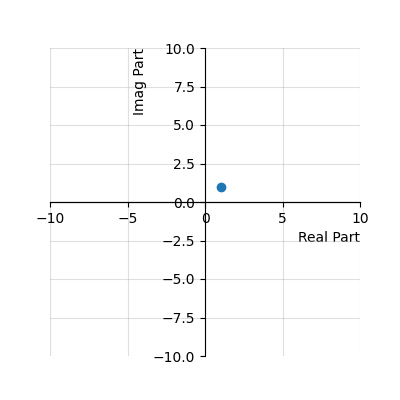

In [3]:
# Plotting a complex number in the complex plane

fig, ax = plt.subplots(figsize=(4,4)) # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
line, = ax.plot([], [], 'o')
ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')

# These commands are just decorations on the plot
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


# Create the interactive plot
def update(z_real = 1, z_imag = 1):
    
    line.set_data([z_real], [z_imag])
    fig.canvas.draw_idle()

print('Move sliders to change the real and imaginary parts of the complex number.')
interact(update, z_real = (-10,10,1), z_imag  = (-10,10,1))
plt.show()





### Vector representation

We can also think of complex numbers as a $2 \times 1$ column vector where the entries correspond to the real and imaginary part. For instance , for a complex number, $z = 2 + j7$, this can be represented as a vector $\begin{bmatrix} 2 \\ 7 \end{bmatrix}$.

And hence we can think about this as a vector in the complex plane as follows.


Move sliders to change the real and imaginary parts of the complex number.


interactive(children=(IntSlider(value=2, description='z_real', max=10, min=-10), IntSlider(value=7, descriptio…

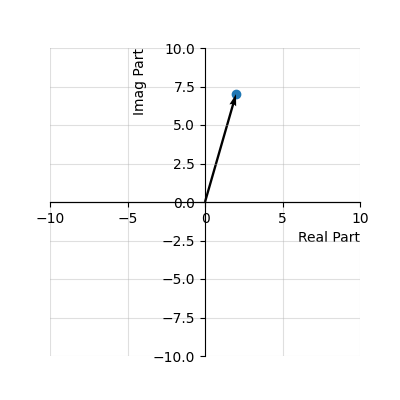

In [5]:
fig, ax = plt.subplots(figsize=(4,4)) # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis

# line, = ax.plot([], [],'--o') 
#ax.quiver(z.real, z.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')

# These commands are just decorations on the plot
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

# Create the interactive plot
def update(z_real = 2, z_imag = 7):
    
    cn.set_offsets([z_real, z_imag])
    qc.set_UVC(z_real, z_imag)
    fig.canvas.draw_idle()

print('Move sliders to change the real and imaginary parts of the complex number.')
interact(update, z_real = (-10,10,1), z_imag  = (-10,10,1))
plt.show()


### Revisiting addition 

As we have seen that complex numbers can be represented as vectors on the complex plane, this in fact gives us a new interpretation of how complex numbers are added. It is simply the sum of two vectors. Recall our summation rule 

$$\begin{align}
z_{1} + z_{2} &= (a + jb) + (c + jd) = (a+c) + j(b+d)
\end{align}$$

Using our vector representation, we could alternatively express this as 

$$\begin{equation}
\begin{bmatrix} a \\ b \end{bmatrix} + \begin{bmatrix} c \\ d \end{bmatrix} = \begin{bmatrix} a + c \\ b + d \end{bmatrix}
\end{equation}$$

which is [vector addition](https://www.youtube.com/watch?v=8QihetGj3pg). 

Let's see this graphically. In the figure below, each of the vectors representing each of the complex numbers has by default its starting point as the origin. However the origin is in fact an arbitray choice as the vector itself represents a fixed translation along the real axis and a fixed translation along the imaginary axis starting from any point in the complex plane. These vectors are therefore also shown in a lighter colour as starting from the end point of one of the other vectors (think about this). For instance, let's look at the orange vector starting from the origin. The complex number $z_{1}$ tells us move along the real axis by 4 units and along the imaginary axis by 6 units, which is where the arrow ends. From this point on the complex plane, we can then "add" $z_{2}$ by 3 units on the real axis and -5 units on the imaginary axis, which is represented by the lighter green vector. The point at which this arrow ends up is now in fact the sum of the two vectors which is represented by the black arrow. 

Starting $z_{2}$ instead, reason for yourself why this vector addition makes sense. Also try different complex numbers for $z_{1}$ and $z_{2}$ to see how things change. We'll look at a graphical view of multiplication and division later on.


Move sliders to change the real and imaginary parts of the complex numbers and visualize the addition.


interactive(children=(IntSlider(value=4, description='z1_real', max=10, min=-10), IntSlider(value=6, descripti…

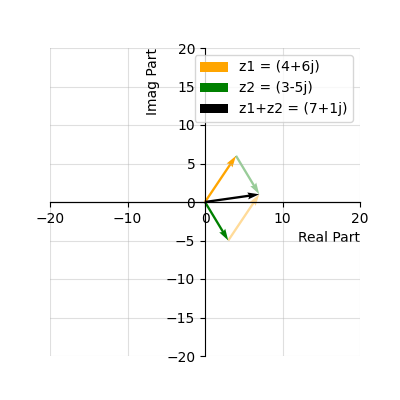

In [7]:
fig, ax = plt.subplots(figsize=(4,4)) # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis

qc1 = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # 1st vector
qc11 = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy',scale=1,color='orange',alpha=0.4) # 1st vector (translated to show vector addition)
qc2 = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1, color='green') # second vector
qc22 = ax.quiver(0, 0, 0, 0, angles='xy', scale_units='xy',scale=1, color='green', alpha=0.4) # second vector
qcsum = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # sum

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')

# These commands are just decorations on the plot
ax.set_xlim([-20, 20]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-20, 20])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


def update(z1_real = 4, z1_imag = 6, z2_real = 3, z2_imag = -5):

    global qc1
    qc1.remove()

    global qc11
    qc11.remove()

    global qc2
    qc2.remove()

    global qc22
    qc22.remove()
    global qcsum
    qcsum.remove()


    z1 = z1_real + z1_imag * 1j
    z2 = z2_real + z2_imag * 1j
    z_sum = z1+z2


    qc1 = ax.quiver(z1_real, z1_imag, angles='xy', scale_units='xy',scale=1, label ='z1 = '+str(z1), color='orange') 
    qc11 = ax.quiver(z2_real, z2_imag, z1_real, z1_imag, angles='xy', scale_units='xy',scale=1,color='orange',alpha=0.4) # 1st vector (translated to show vector addition)
    
    qc2 = ax.quiver(z2_real, z2_imag, angles='xy', scale_units='xy',scale=1, label ='z2 = '+str(z2), color='green') # second vector
    qc22 = ax.quiver(z1_real, z1_imag, z2_real, z2_imag, angles='xy', scale_units='xy',scale=1, color='green', alpha=0.4)

    qcsum = ax.quiver(z_sum.real, z_sum.imag, angles='xy', scale_units='xy',scale=1, label='z1+z2 = '+str(z_sum)) # sum

    ax.legend()

    fig.canvas.draw_idle()
    
print('Move sliders to change the real and imaginary parts of the complex numbers and visualize the addition.')
interact(update, z1_real = (-10,10,1), z1_imag  = (-10,10,1), z2_real = (-10,10,1), z2_imag  = (-10,10,1))
plt.show()






### Modulus, Argument, Complex conjugate

Now that we have a graphical interpretation of a complex number, there are a few other properties of complex numbers that are a bit easier to define, namely the modulus, argument, and complex conjugate.

#### Modulus

The modulus of a complex number can be thought of the length of the vector it represents in the complex plane. For a complex number, $z = a +jb$, its modulus, denoted as $|z|$, is defined as

$$\begin{align}
|z| &= \sqrt{\Re{\{z\}}^{2} + \Im{\{z\}}^{2}} \nonumber \\
    &= \sqrt{a^{2} + b^{2}}
\end{align}$$

where $\Re{\{z\}}$ denotes the real part of $z$ and $\Im{\{z\}}$ denotes the imaginary part of $z$. 


#### Argument

The argument of a complex number is defined as the angle between the real-axis (in the positive direction) and the vector representing the complex number. There are a number of notations for the argument of a complex number, such as $\angle{z}$, $\arg{(z)}$ or sometimes simply $\theta$, and is defined as

$$\begin{align}
\angle{z} = \arg{(z)} = \theta &= \arctan \left( \frac{\Im{\{z\}}}{\Re{\{z\}}} \right)   \nonumber \\
    &= \arctan \left( \frac{b}{a} \right) 
\end{align}$$

### Complex conjugate

The complex conjugate of a complex number,$z$, is another complex number which has an identical real part but the opposite sign for the imaginary part. In terms of our graphical representation, the complex conjugate is another vector with the same length as $z$ but reflected across the real axes. The complex conjugate of $z$ is denoted as $z^{*}$ and is defined as 

$$\begin{align}
\text{for a complex number } z &= a + jb, \\
\text{its complex conjugate}, z^{*} &=  a -jb
\end{align}$$

#### Graphical understanding
Let's have a look at these properties graphically to get a better understanding of them.

Move sliders to change the real and imaginary parts of the complex number.


interactive(children=(IntSlider(value=2, description='z_real', max=10, min=-10), IntSlider(value=7, descriptio…

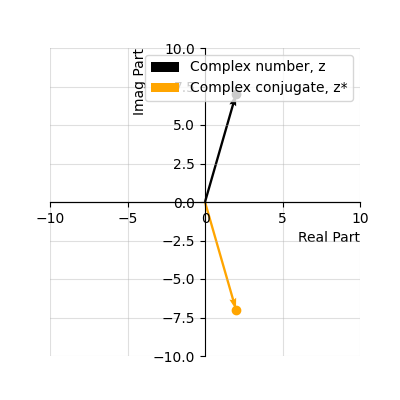

In [9]:
fig, ax = plt.subplots(figsize=(4,4)) 

cn = ax.scatter([], [], color='black') # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1, label='Complex number, z') 
cnconj = ax.scatter([], [], color='orange') 
qcconj = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange',label='Complex conjugate, z*') 

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')

# These commands are just decorations on the plot
ax.set_xlim([-10, 10]) # sets x and y limits of the plot (CHANGE if complex number values greater)
ax.set_ylim([-10, 10])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')
ax.legend()

# Create the interactive plot
def update(z_real = 2, z_imag = 7):
    
    z = z_real + z_imag * 1j

    cn.set_offsets([z_real, z_imag])
    qc.set_UVC(z_real, z_imag) 
    cnconj.set_offsets([z_real, -z_imag])
    qcconj.set_UVC(z_real, -z_imag) 

    # Compute modulus and argument
    z_mod = np.round(np.abs(z), decimals=2)
    z_arg = np.round((np.angle(z)%(2*np.pi)), decimals=2)

    print("The complex number is ", z)
    print("The complex conjugate is ", z.conjugate())
    print("The modulus, |z| is ",z_mod, "(length of vector)")
    print("The argument, arg(z) is ",z_arg," (angle in radians between the vector of z and the positive real axis)")
 
    fig.canvas.draw_idle()

print('Move sliders to change the real and imaginary parts of the complex number.')
interact(update, z_real = (-10,10,1), z_imag  = (-10,10,1))
plt.show()




### Polar Form of complex numbers

Having understood the modulus and argument of a complex number, we are in the perfect position to express complex numbers in a particular form called its **polar form**. The previous $z = a + jb$ is referred to as the standard form, but we can express a complex number as well in its polar form as follows

$$\begin{align}
z &= r \left(\cos(\phi) + j \sin(\phi) \right) \\
\end{align}$$

where we denote $r$ as the modulus of $z$, i.e. $r = |z|$, and $\phi$ is the argument of $z$. 

You are probably thinking - how can we do this? Well, we again go back to our geometric or graphical representation of complex numbers. The vector that represents the complex number can actually be decomposed into two other vectors - one that lives on the real axis and the other on the imaginary axis. In other words, for a complex number, $z = a + jb$, in vector form, we can do the following:

$$\begin{equation}
\begin{bmatrix} a \\ b  \end{bmatrix} = \underbrace{\begin{bmatrix} a \\ 0  \end{bmatrix}}_{\text{vector on real axis}} + \underbrace{\begin{bmatrix} 0 \\ b  \end{bmatrix}}_{\text{vector on imaginary axis}}
\end{equation}$$

To make the relation to polar form, we need to recall some trigonometry. What is the length of the decomposed vectors on the real axis and the imaginary axis? It's simply $a$ and $b$ respectively, right? The vector of the complex number, along with these decomposed vectors forms a right-angled triangle as shown below

<br>
<br>

<div>
<center> <img src="complexnum_polar.png" width="150"/> <center/>
    <p style="text-align:center">Fig. 1 - Complex number decomposed into its real and imaginary parts in polar form. </p>
</div>

<br>
<br>


Hence, we can deduce that

$$\begin{align}
\cos \phi &= \frac{a}{r} \rightarrow a = r \cos \phi \nonumber \\
\sin \phi &= \frac{b}{r} \rightarrow b = r \sin \phi \nonumber \\
\end{align}$$

and we can verify the length of the vector (i.e. the modulus of the complex number) is

$$\begin{align}
\sqrt { (r \cos(\phi))^{2} + (r \sin(\phi))^{2}}  &= \sqrt { r^{2} (\cos^{2}(\phi) + \sin^{2}(\phi) )} \nonumber \\
  & = \sqrt{r^{2}} \nonumber \\
  & = r
\end{align}$$


Hence, replacing $a$ and $b$ in our standard form of $z = a +jb$ then yields the polar form

$$\begin{align}
z &= r \left(\cos(\phi) + j\sin(\phi) \right) \\
  &= \underbrace{r \cos(\phi)}_{a} + j \underbrace{r\sin(\phi)}_{b}
\end{align}$$

where $r$ is the modulus of the complex number and $\phi$ is its argument.

Let's get some visual intuition of this.

Move sliders to change the modulus (r) and argument (phi) of the polar form of the complex number.
Recall r corresponds to the length of the vector and phi is the angle between the vector and the positive real axis.
Note the decomposition of the complex number into its real and imaginary parts.
Also note that as we increase the value of phi, the complex number rotates in an anti-clockwise manner.


interactive(children=(FloatSlider(value=1.5, description='r', max=2.0), FloatSlider(value=0.7853981633974483, …

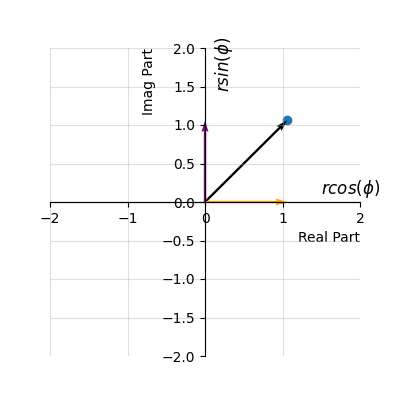

In [12]:

# Setting up figure
fig, ax = plt.subplots(figsize=(4,4)) 

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='purple') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.text(1, 0, "$r cos(\phi)$", fontsize=12,position=(1.5,0.1))
ax.text(0, 1, "$r sin(\phi)$", fontsize=12,rotation = 90, position=(0.1,1.5))

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')

# These commands are just decorations on the plot 
ax.set_xlim([-2, 2]) # sets x and y limits of the plot 
ax.set_ylim([-2, 2])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

    
def update(r = 1.5, phi = np.pi/4):

    z = r*(np.cos(phi) + 1j*np.sin(phi)) # Polar form of complex number

    # These update the plots
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)
    qr.set_UVC(z.real, 0)
    qi.set_UVC(0, z.imag)
    fig.canvas.draw_idle()


print('Move sliders to change the modulus (r) and argument (phi) of the polar form of the complex number.')
print('Recall r corresponds to the length of the vector and phi is the angle between the vector and the positive real axis.')
print('Note the decomposition of the complex number into its real and imaginary parts.')
print('Also note that as we increase the value of phi, the complex number rotates in an anti-clockwise manner.')

interact(update, r = (0, 2, 0.1), phi = (0, 2*np.pi, 0.1))
plt.show()


### Exponential form of complex numbers

#### Euler's identity

Yet another useful, and arguably the most useful representation of complex numbers is its **exponential form**, which stems from [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) which is given by

$$\begin{equation}
e^{j\phi} = \cos \phi + j \sin \phi
\end{equation}$$

where $e$ is the exponential function. In words, this equation says that the exponential of the complex number, $j \phi$, is equivalent to another complex number whose real part is $\cos \phi$ and imaginary part is $\sin \phi$, i.e. a complex number in polar form with a modulus of 1 and an argument $\phi$. As you may already expect, this equation has a beautiful geometric interpretation. It corresponds to complex numbers on the [unit circle](https://en.wikipedia.org/wiki/Unit_circle) in the complex plane, i.e. a circle of radius 1 (since the modulus is 1).

Let's have a look a closer look at this. How does the complex number vary as we change $\phi$?


Move sliders to change the argument (phi (radians)) of the complex exponential form of the complex number.
Recall r is one, hence the complex number is always on the unit circle and phi is the angle between the vector and the positive real axis.
Note the decomposition of the complex number into its real and imaginary parts.
Also note that as we increase the value of phi, the complex number rotates in an anti-clockwise manner with a period of 2 pi.


interactive(children=(FloatSlider(value=0.7853981633974483, description='phi', max=12.566370614359172), Output…

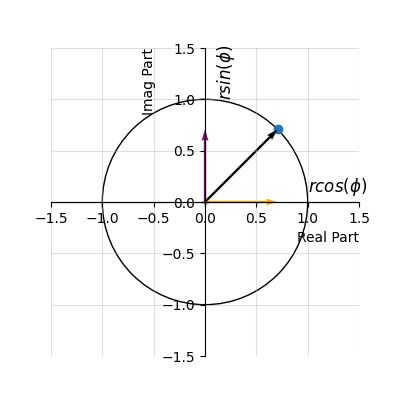

In [13]:
# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots(figsize=(4,4)) 
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='purple') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.text(1, 0, "$r cos(\phi)$", fontsize=12,position=(1,0.1))
ax.text(0, 1, "$r sin(\phi)$", fontsize=12,rotation = 90, position=(0.1,1.05))

ax.set_xlabel('Real Part',loc='right')
ax.set_ylabel('Imag Part',loc='top')

# These commands are just decorations on the plot 
ax.set_xlim([-1.5, 1.5]) # sets x and y limits of the plot 
ax.set_ylim([-1.5, 1.5])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')


# Create the interactive plot
def update(phi = np.pi/4): # the initial value of the variable you want to put on the slider

    z = np.exp(1j*phi) # Define the complex exponential
    
    # These update the plots
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)
    qr.set_UVC(z.real, 0)
    qi.set_UVC(0, z.imag)
    fig.canvas.draw_idle()

print('Move sliders to change the argument (phi (radians)) of the complex exponential form of the complex number.')
print('Recall r is one, hence the complex number is always on the unit circle and phi is the angle between the vector and the positive real axis.')
print('Note the decomposition of the complex number into its real and imaginary parts.')
print('Also note that as we increase the value of phi, the complex number rotates in an anti-clockwise manner with a period of 2 pi.')


interact(update, phi = (0, 4*np.pi, 0.1))

plt.show()


### General exponential form

But remember in general, we do have some modulus (length) of our complex number and we need to incorporate this. But it is quite simple! We simply need to multiply the previous exponential form by the modulus! We can see why this is the case because using Euler's identity, it will then exactly be equivalent to the polar form. The general exponential form of the complex number is therefore $r e^{j\phi}$

$$\begin{equation}
r e^{j\phi} = r (\cos \phi + j \sin \phi)
\end{equation}$$

where $r$ is the modulus of the complex number.

So now we can in fact see all the different forms of our complex number

| standard form |             polar form            | exponential form |
|:-------------:|:---------------------------------:|:----------------:|
|     a + jb    | r ($\cos \phi$ + j $\sin(\phi)$) |  $r e^{j\phi}$ |          |

There's still a burning question in how this all relates to audio... but we're getting there!
